In [1]:
# Mount to Google Drive for access to documents
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Establish base_path
base_path = "/content/drive/My Drive/Colab Notebooks/COMS5790/Final Project/"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2250 [00:00<?, ? examples/s]

Map:   0%|          | 0/30466 [00:00<?, ? examples/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: george-nicholas-p (george-nicholas-p-iowa-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,0.387000,0.364344,0.902055
2,0.336600,0.365662,0.916366
3,0.216000,0.386753,0.917416


Test Accuracy: 0.917
Classification Report:
                    precision    recall  f1-score   support

        Incorrect       0.91      0.95      0.93     16614
Partially Correct       0.00      0.00      0.00       320
          Correct       0.93      0.90      0.91     13532

         accuracy                           0.92     30466
        macro avg       0.61      0.62      0.61     30466
     weighted avg       0.91      0.92      0.91     30466

Confusion Matrix:
 [[15810     0   804]
 [  202     0   118]
 [ 1392     0 12140]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


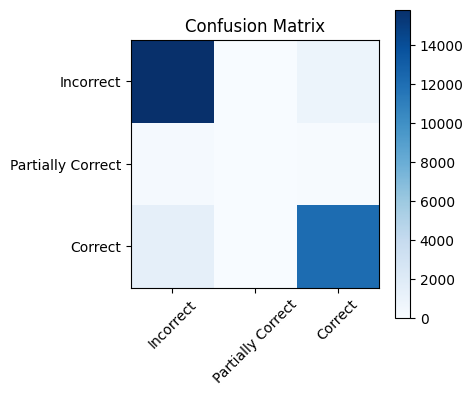

In [3]:
# Install and import necessary libraries
!pip install transformers datasets scikit-learn numpy pandas matplotlib
!pip install datasets --upgrade
!pip install evaluate # Install the evaluate package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from datasets import Dataset
import evaluate # Import evaluate library
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

# 1. Load the dataset (train and test CSVs)
# Assuming train.csv and test.csv are in the current directory or mounted in Colab.
# We use pandas to read the CSV files.
df_train = pd.read_csv(base_path + "train.csv", encoding='latin-1')
df_test = pd.read_csv(base_path + "test.csv", encoding='latin-1')

# 2. Inspect and preprocess data
# The dataset has columns like Question, Response, CorrectAnswer, and label.
# The 'label' is numeric: 1 = correct, 0 = partially correct, -1 = incorrect.
# We'll map these to 0,1,2 for model training (non-negative integers).
label_mapping = {-1: 0, 0: 1, 1: 2}
df_train['label_id'] = df_train['label'].map(label_mapping)
df_test['label_id'] = df_test['label'].map(label_mapping)

# Create a combined text field for each sample.
# We concatenate Question, CorrectAnswer, and Response so that the model sees the full context:
# e.g., "Question: ... Correct Answer: ... Student Response: ...".
# This way, the model can compare the student response against the expected answer.
def make_input_text(row):
    return (f"Question: {row['Question']} "
            f"Correct Answer: {row['CorrectAnswer']} "
            f"Student Response: {row['Response']}")

df_train['input_text'] = df_train.apply(make_input_text, axis=1)
df_test['input_text'] = df_test.apply(make_input_text, axis=1)

# 3. Convert to Hugging Face Datasets for easier batching and tokenization
train_dataset = Dataset.from_pandas(df_train[['input_text', 'label_id']])
test_dataset = Dataset.from_pandas(df_test[['input_text', 'label_id']])

# 4. Load a pre-trained tokenizer and model (RoBERTa-base for sequence classification)
model_name = "roberta-base"  # using RoBERTa base model (110M parameters, similar size to BERT-base)
tokenizer = AutoTokenizer.from_pretrained(model_name)
# AutoModelForSequenceClassification will create a classification head with the specified number of labels
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# 5. Tokenize the dataset
# We define a preprocessing function to tokenize the text inputs.
def preprocess_function(examples):
    # Tokenizer will handle splitting text into tokens and mapping to IDs,
    # and we'll use the special [SEP] token to separate parts if needed.
    return tokenizer(examples['input_text'], truncation=True, padding='max_length', max_length=256)

# Apply the tokenizer to the dataset. This might take a minute for large datasets.
train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

# Rename the label column from 'label_id' to 'labels' as expected by the Trainer
train_dataset = train_dataset.rename_column("label_id", "labels")
test_dataset = test_dataset.rename_column("label_id", "labels")

# Set the format for PyTorch (so we get torch.Tensors for Trainer)
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# 6. Define the training arguments
# These settings tell the Trainer how to train: where to save models, batch sizes, learning rate, epochs, etc.
training_args = TrainingArguments(
    output_dir="bert_grading_model",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,  # we'll fine-tune for 3 epochs; this can be tuned if necessary
    weight_decay=0.01,
    logging_dir="logs",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
)

# 7. Define a metrics function for evaluation
# We'll use accuracy as a simple metric for now (and we can later examine precision/recall by class).
#import evaluate # No need to import again
accuracy_metric = evaluate.load("accuracy") # load_metric is now part of evaluate

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    # Convert model outputs (logits) to predicted class indices
    predictions = np.argmax(logits, axis=-1)
    # Compute accuracy using the loaded metric
    acc = accuracy_metric.compute(predictions=predictions, references=labels)
    return {"accuracy": acc['accuracy']}

# 8. Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,  # we can use test set for evaluation here (or use a validation split if available)
    compute_metrics=compute_metrics
)

# 9. Fine-tune the model
trainer.train()

# 10. Evaluate on the test set
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)

# Access the labels from the predictions object
true_labels = predictions.label_ids

# Calculate overall accuracy
accuracy = np.mean(pred_labels == true_labels)
print(f"Test Accuracy: {accuracy:.3f}")

# Generate a classification report (precision, recall, F1 for each class)
label_names = ["Incorrect", "Partially Correct", "Correct"]  # mapping back to original meaning
report = classification_report(true_labels, pred_labels, target_names=label_names)
print("Classification Report:\n", report)

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:\n", cm)

# (Optional) visualize the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xticks(ticks=[0,1,2], labels=label_names, rotation=45)
plt.yticks(ticks=[0,1,2], labels=label_names)
plt.colorbar()
plt.show()